In [32]:
%pip install yfinance

You should consider upgrading via the 'c:\Users\Saurav\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [33]:
# Imort main libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for photing and viewing data
import matplotlib.pyplot as plt# plotting library
import yfinance as yfin

In [34]:
stock=["AMZN"]
data=yfin.download(tickers=stock,start="1997-01-23",end="2024-01-23")

c:\Users\Saurav\AppData\Local\Programs\Python\Python310\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [35]:
stock_data=data.reset_index()

df=stock_data

In [36]:
#df=pd.read_csv('Amazon.csv')

In [37]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [38]:
df.set_index('Date',inplace = True)# Set the date to be the index

In [39]:
# resorting the data
df.index =  pd.to_datetime(df.index,format='%Y-%m-%d')

In [40]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-16,153.529999,154.990005,152.149994,153.160004,153.160004,41384600
2024-01-17,151.490005,152.149994,149.910004,151.710007,151.710007,34953400
2024-01-18,152.770004,153.779999,151.820007,153.500000,153.500000,37850200
2024-01-19,153.830002,155.759995,152.740005,155.339996,155.339996,51033700
2024-01-22,156.889999,157.050003,153.899994,154.779999,154.779999,43509700


# Now Plots

Text(0.5, 1.0, 'Amazon Stock at all time')

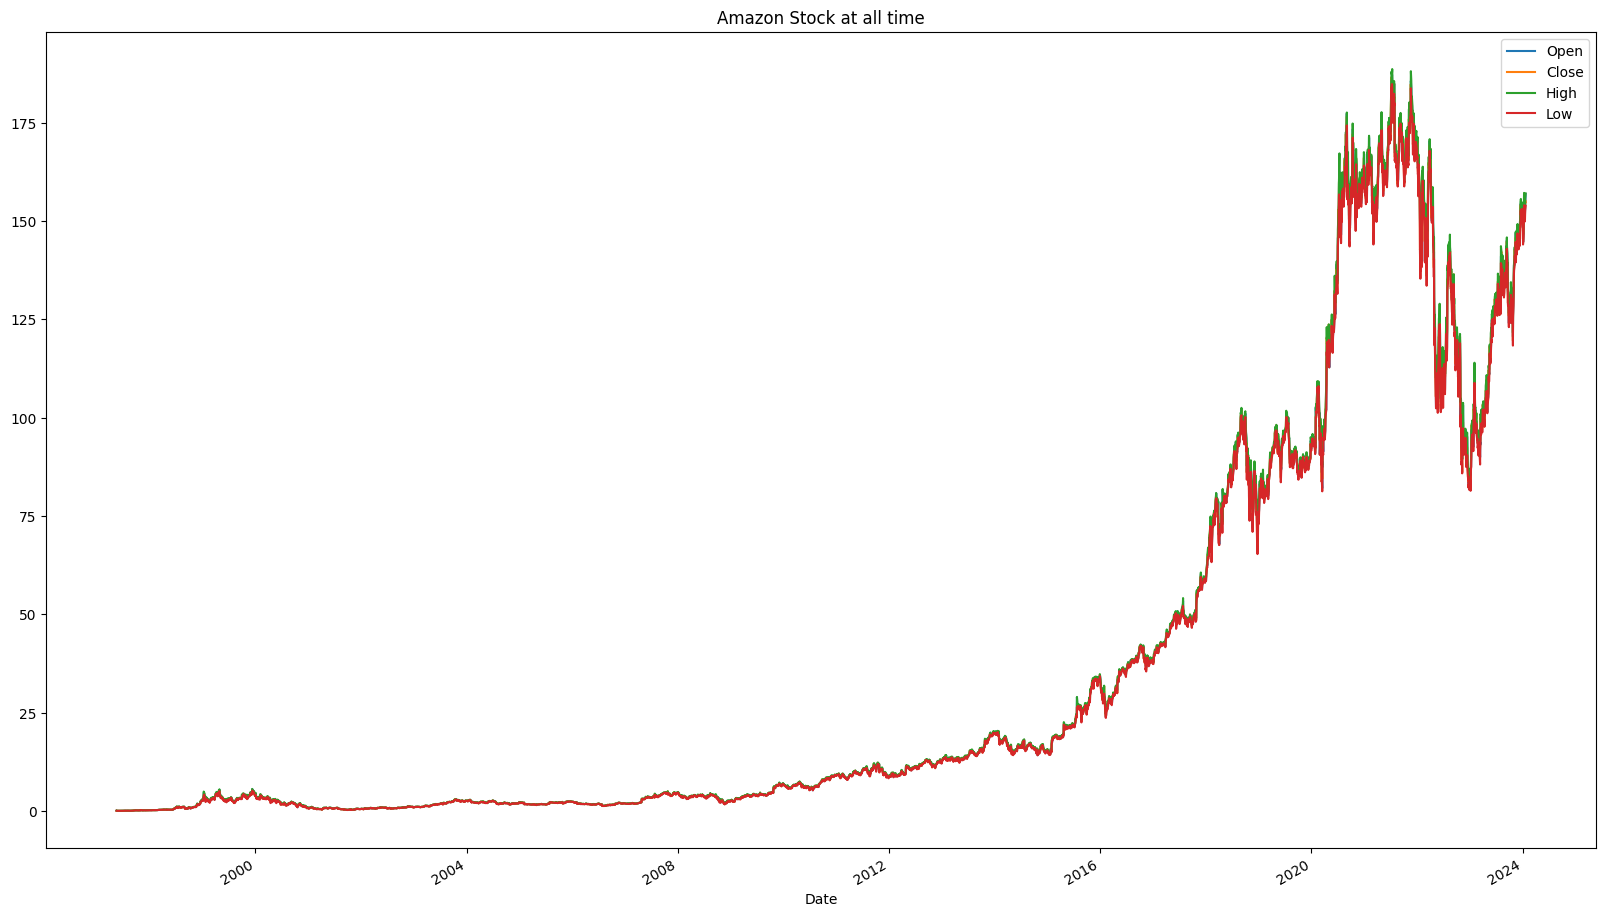

In [41]:
df[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Amazon Stock at all time')

Text(0, 0.5, 'Stock action')

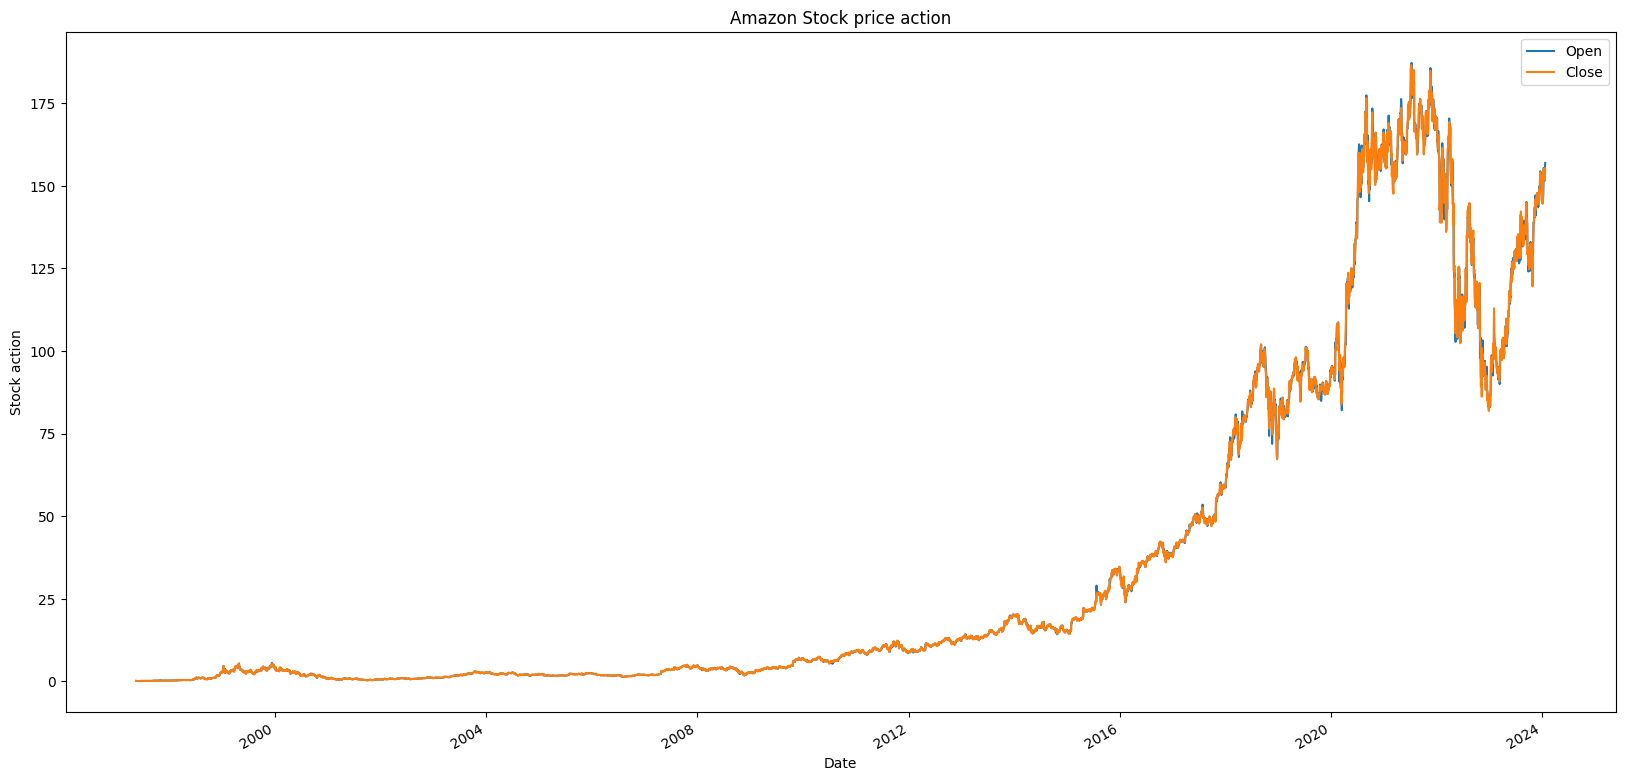

In [42]:
df[['Open','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

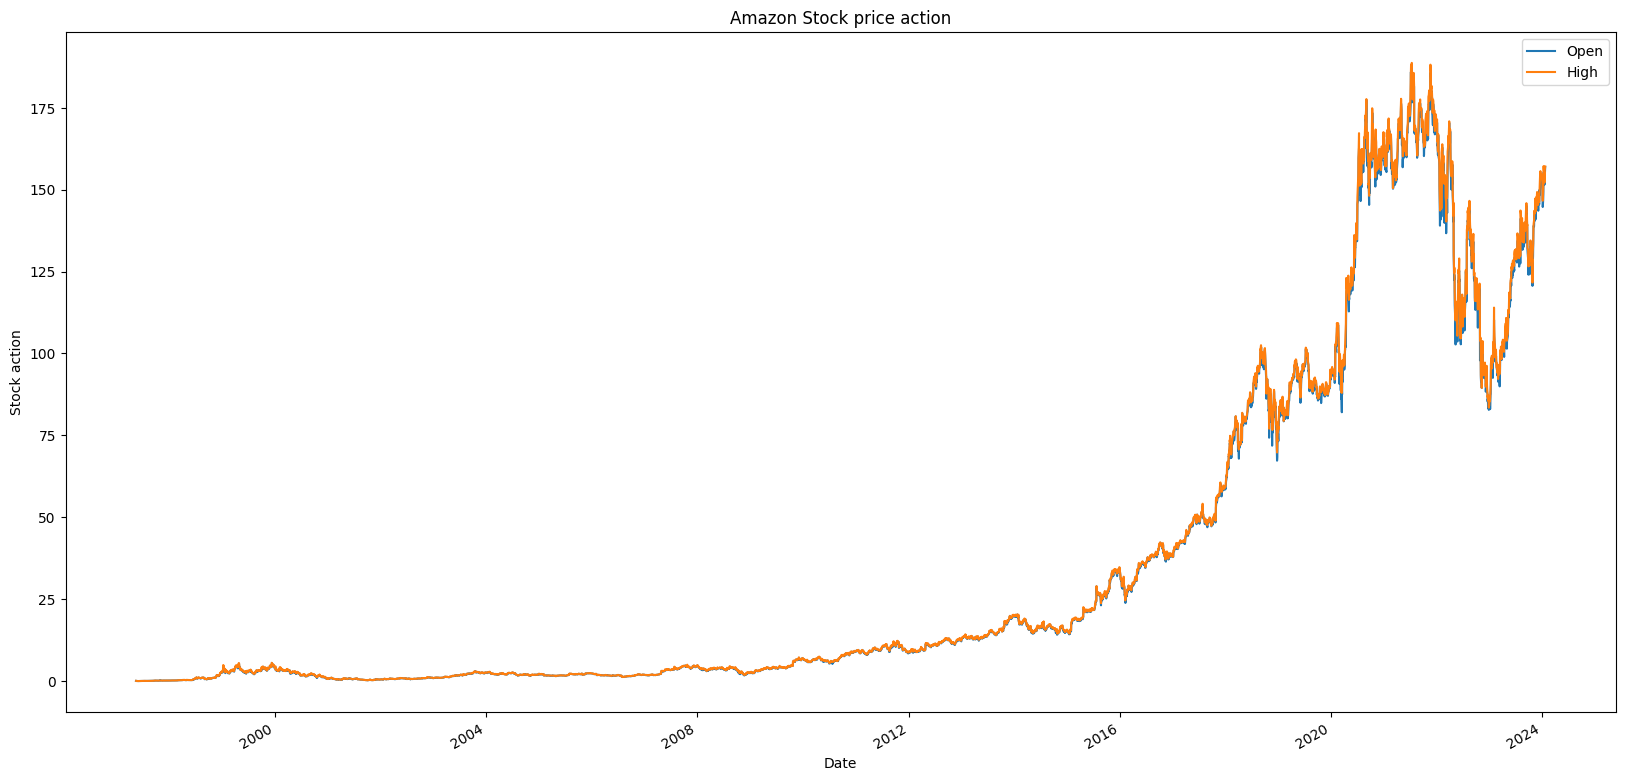

In [43]:
df[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

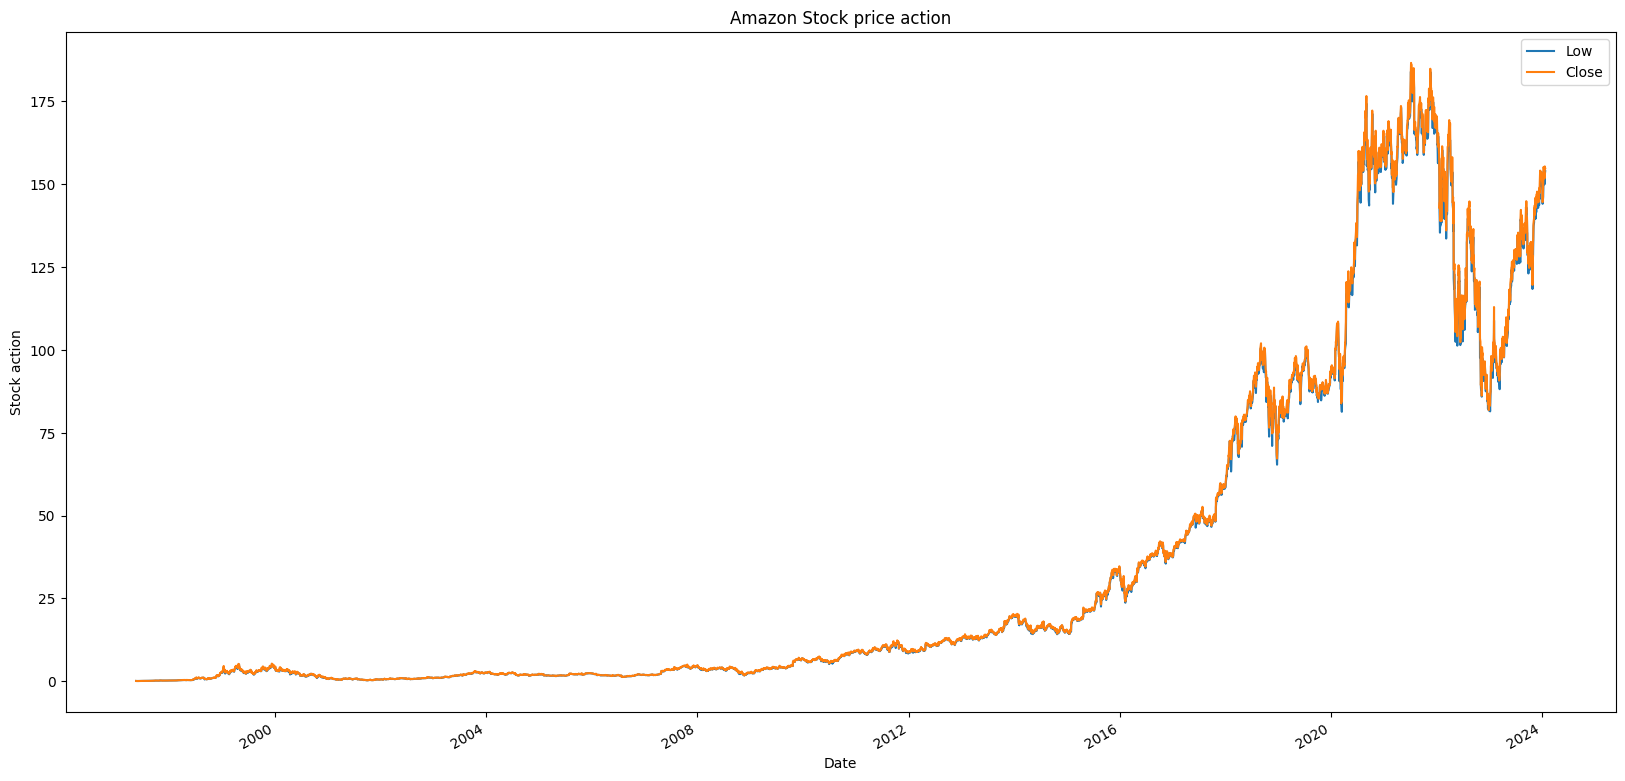

In [44]:
df[['Low','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

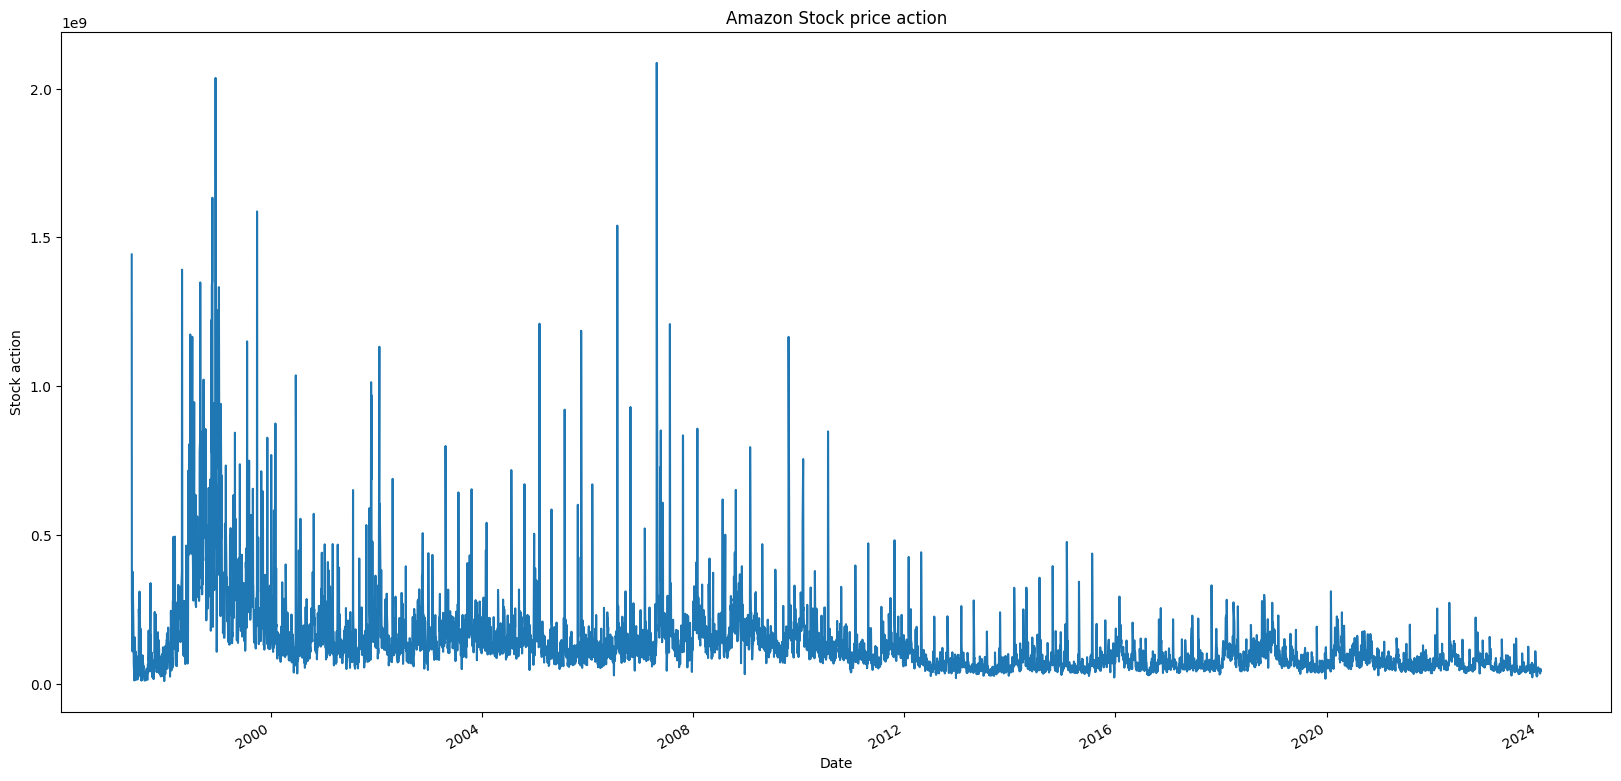

In [45]:
df['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

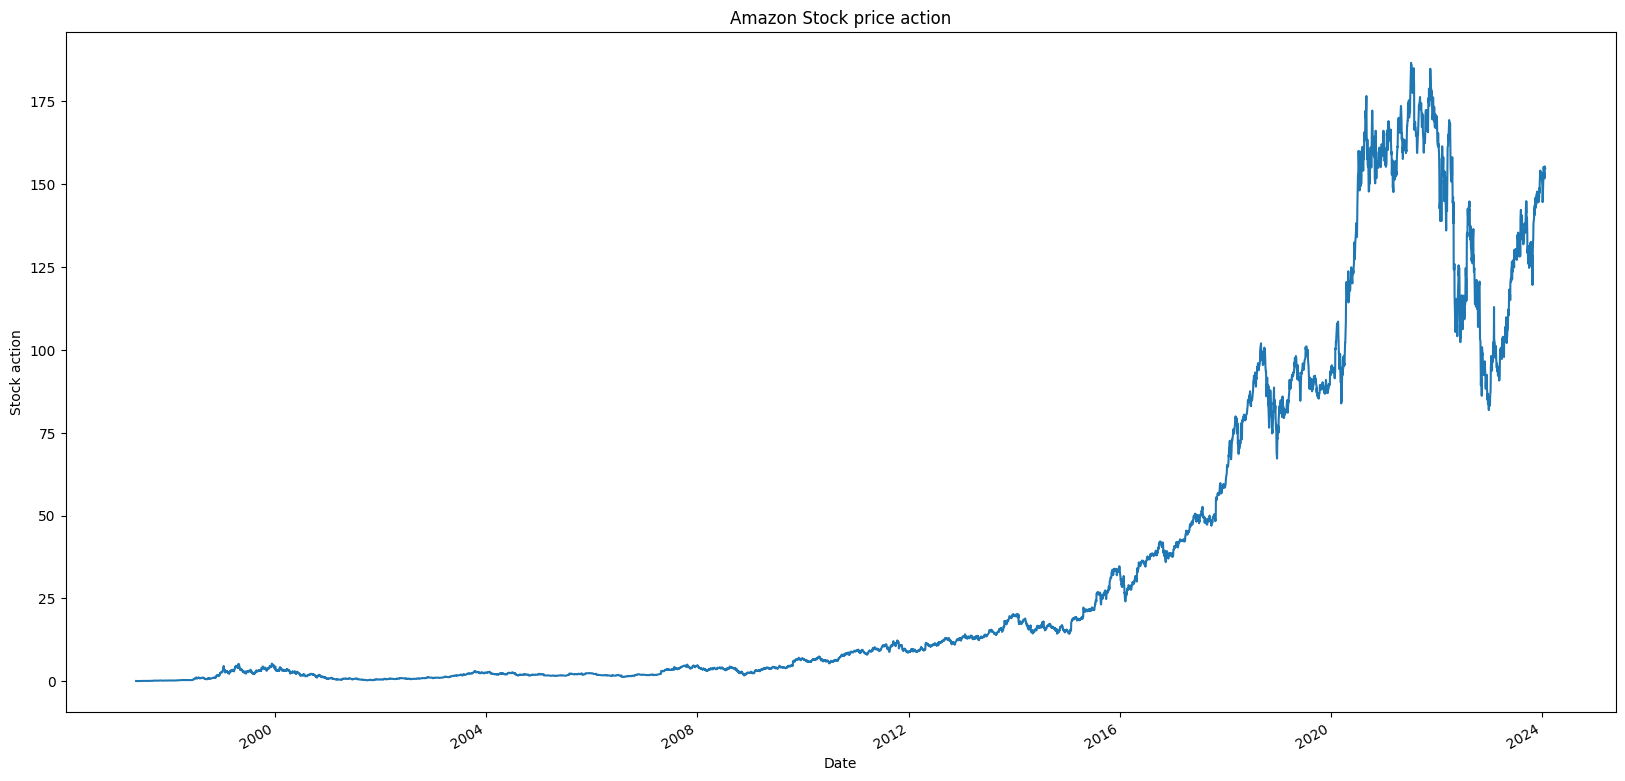

In [46]:
df['Adj Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

# From the previous analysis and visualization, it can take the data from 2015 as the previous years doesn't important, not have a stock price variance

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2022')

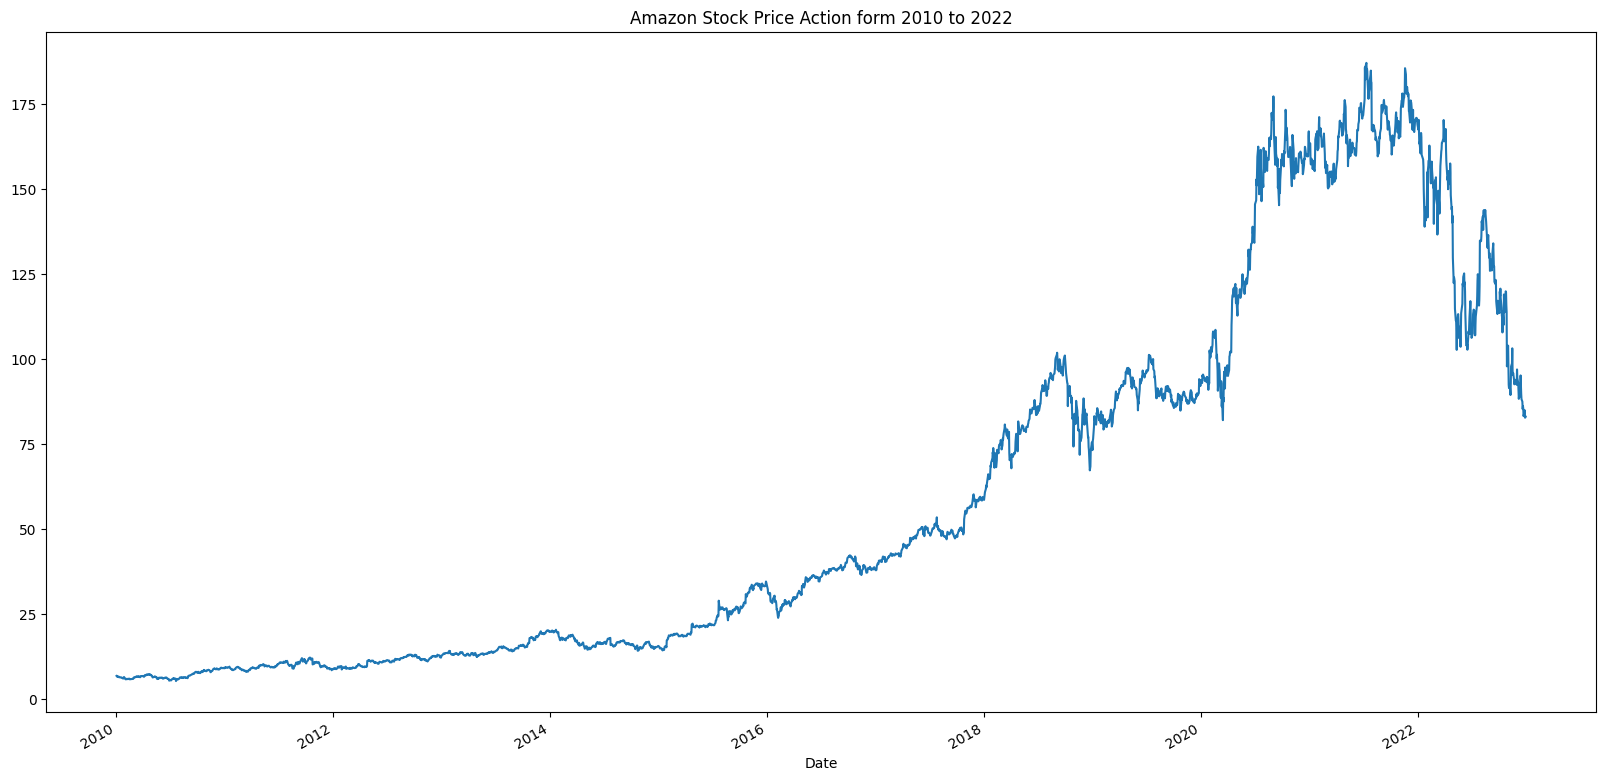

In [47]:
Ama = df['2010':'2022']


Ama['Open'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2012 to 2022')

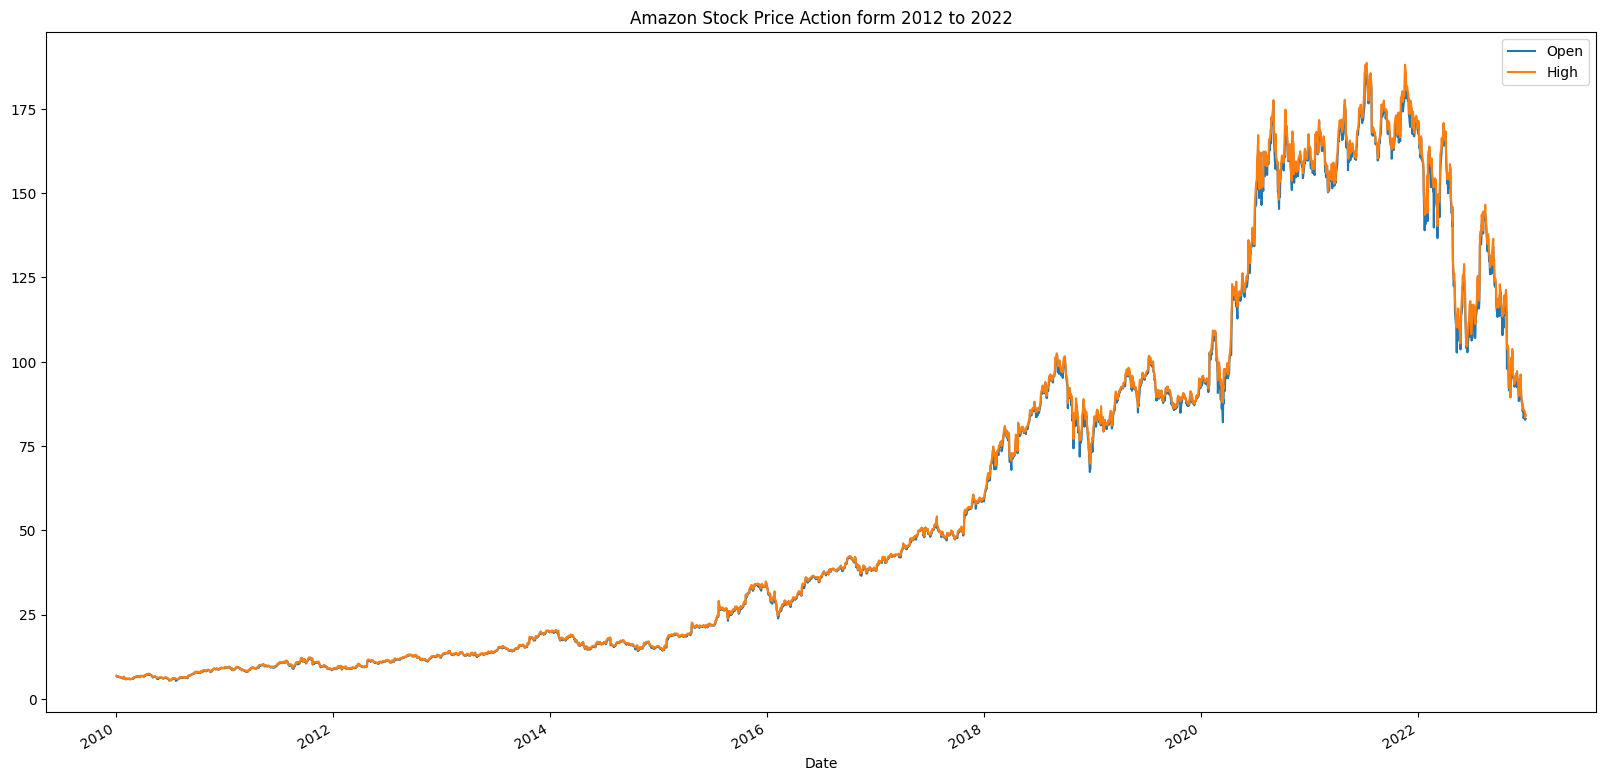

In [48]:
Ama[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2012 to 2022')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2022')

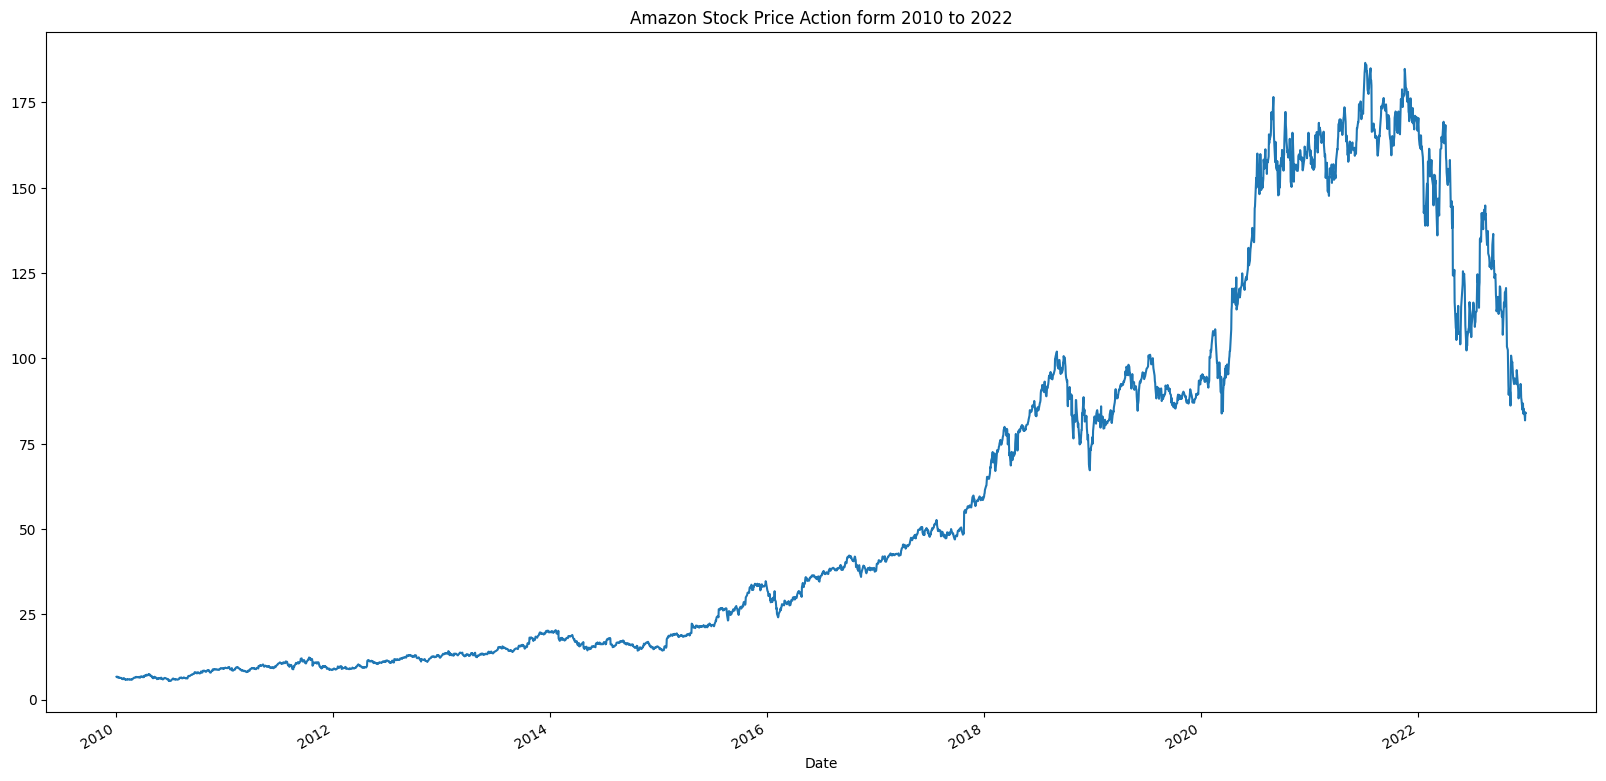

In [49]:
Ama['Adj Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2022')

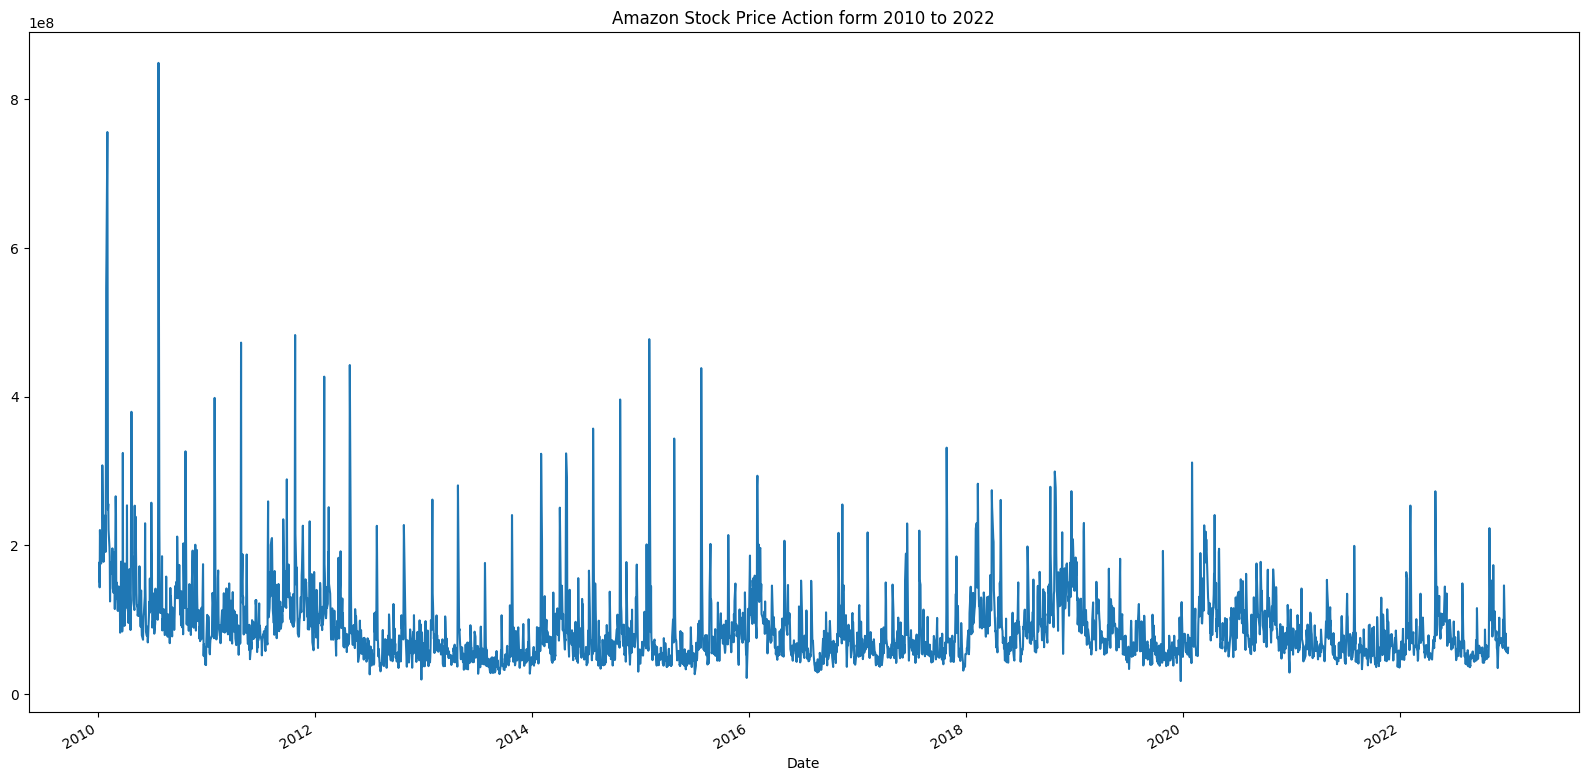

In [50]:
Ama['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022')

In [51]:
Ama.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,58.944595,59.618274,58.190704,58.912957,58.912957,8.833206e+07
std,54.131982,54.778610,53.404214,54.078546,54.078546,5.308631e+07
min,5.296500,5.564500,5.290000,5.430500,5.430500,1.762600e+07
25%,13.345375,13.474750,13.199250,13.327125,13.327125,5.611750e+07
50%,36.331001,36.537500,36.053751,36.393749,36.393749,7.457900e+07
75%,93.012501,94.165876,92.019377,93.131001,93.131001,1.037110e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,8.484220e+08


# Augmented Dickey Fuller Test (ADF)

ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not

In [52]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [53]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                    0.520351
p-value                           0.985479
#Lags Used                       31.000000
Number of Observations Used    6683.000000
Critical Value (1%)              -3.431329
Critical Value (5%)              -2.861973
Critical Value (10%)             -2.567000
dtype: float64
None


In [54]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                  -0.072383
p-value                          0.952121
#Lags Used                       9.000000
Number of Observations Used    311.000000
Critical Value (1%)             -3.451553
Critical Value (5%)             -2.870879
Critical Value (10%)            -2.571746
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                  -1.760249
p-value                          0.400368
#Lags Used                       8.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64
None


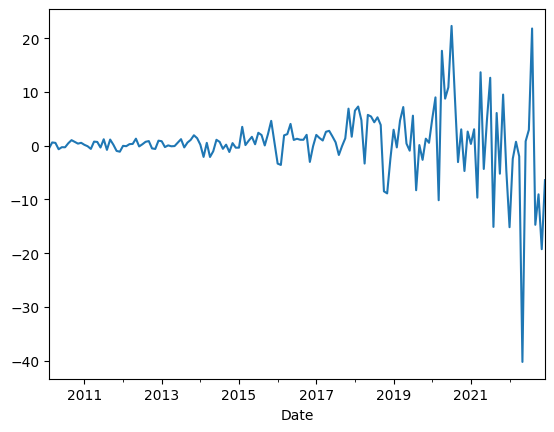

In [55]:
Ama_diff = Ama['Open'].resample('MS').mean() - Ama['Open'].resample('MS').mean().shift(1)
Ama_open_diff = Ama_diff.dropna()
Ama_open_diff.plot()


print(adf_test(Ama_open_diff))

In [56]:
train_Ama = Ama['Open'].iloc[:-4]

print(len(train_Ama))
X_train=[]
y_train=[]

for i in range(2, len(train_Ama)):
    X_train.append(train_Ama[i-2:i])
    y_train.append(train_Ama[i])

3268


C:\Users\Saurav\AppData\Local\Temp\ipykernel_8364\2207947505.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train.append(train_Ama[i])


In [57]:
import math
train_len = math.ceil(len(train_Ama)*0.8)
train_len

2615

In [58]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [60]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11701 (45.71 KB)
Trainable params: 11701 (45.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10

33/33 - 6s - loss: 2945.3726 - 6s/epoch - 173ms/step
Epoch 2/10
33/33 - 0s - loss: 60.9617 - 294ms/epoch - 9ms/step
Epoch 3/10
33/33 - 0s - loss: 6.2151 - 215ms/epoch - 7ms/step
Epoch 4/10
33/33 - 0s - loss: 4.4871 - 196ms/epoch - 6ms/step
Epoch 5/10
33/33 - 0s - loss: 

<Axes: >

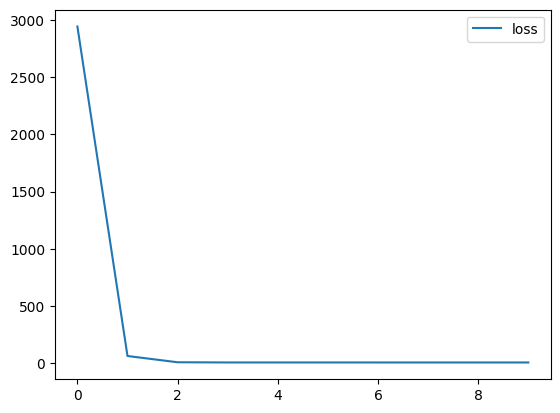

In [61]:
losse = pd.DataFrame(model.history.history)
losse[['loss']].plot()

In [62]:
test_data = train_Ama[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

C:\Users\Saurav\AppData\Local\Temp\ipykernel_8364\3680827418.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_val.append(test_data[i])


In [63]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)

21/21 [==============================] - 1s 6ms/step


In [66]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

21/21 [==============================] - 0s 5ms/step
Train rmse: 2.077448861064392
Validation rmse: 4.0479178660833135


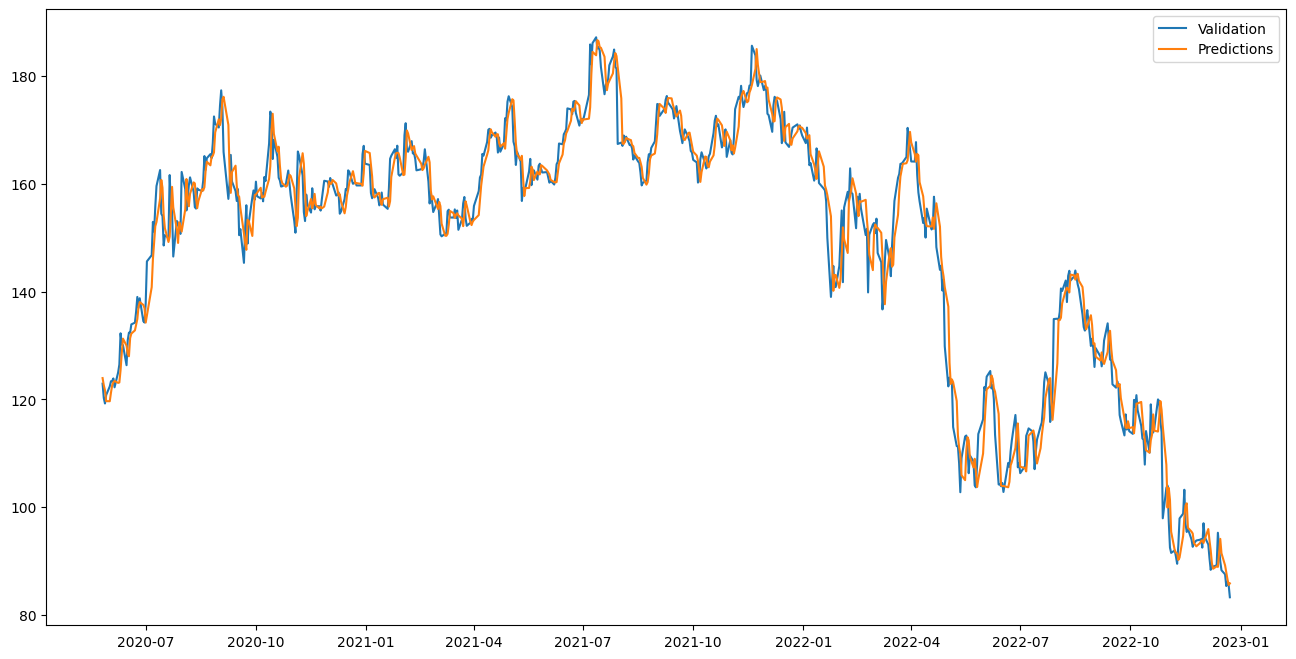

In [67]:
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['Open','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [70]:
%pip install plotly

You should consider upgrading via the 'c:\Users\Saurav\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [73]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

# Set layout options
fig.update_layout(title='Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')

# Show the plot
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [68]:
# data frame to see the percentage of error between real and predicted

variance = []
for i in range(len(valid)):
  
  variance.append(valid['Open'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

C:\Users\Saurav\AppData\Local\Temp\ipykernel_8364\317183523.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  variance.append(valid['Open'][i]-valid['Predictions'][i])


,0
count,653.000000
mean,-0.028206
std,4.050923
min,-17.100204
25%,-2.253830
50%,-0.155289
75%,2.313843
max,16.122208


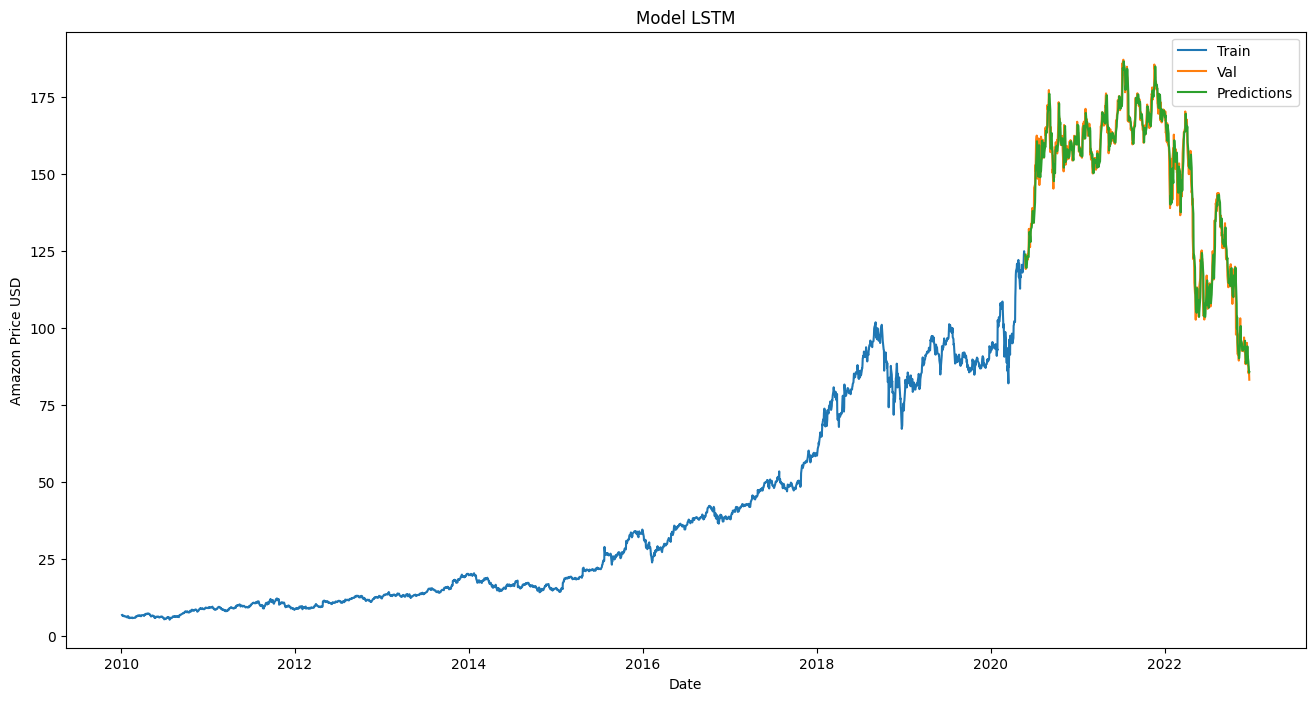

In [69]:
train = train_Ama[:train_len]
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Amazon Price USD')
plt.plot(train)
plt.plot(valid[['Open','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()